## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use("ggplot")

######### Import Dataset ############
df = pd.read_csv('SmokeBan_Dataset.csv')

## Exploring Data

In [3]:
df.shape

(10003, 8)

In [4]:
df.head()

,Unnamed: 0,smoker,ban,age,education,afam,hispanic,gender
0,1,yes,yes,41,hs,no,no,female
1,2,yes,yes,44,some college,no,no,female
2,3,no,no,19,some college,no,no,female
3,4,yes,no,29,hs,no,no,female
4,5,no,yes,28,some college,no,no,female


In [5]:
df['education'].value_counts()

hs              3267
some college    2803
college         1972
master          1049
hs drop out      912
Name: education, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10003 non-null  int64 
 1   smoker      10003 non-null  object
 2   ban         10003 non-null  object
 3   age         10003 non-null  int64 
 4   education   10003 non-null  object
 5   afam        10003 non-null  object
 6   hispanic    10003 non-null  object
 7   gender      10003 non-null  object
dtypes: int64(2), object(6)
memory usage: 625.3+ KB


In [7]:
df.describe()

,Unnamed: 0,age
count,10003.000000,10003.000000
mean,4999.029491,38.690393
std,2887.711251,12.113466
min,1.000000,18.000000
25%,2498.500000,29.000000
50%,4999.000000,37.000000
75%,7499.500000,47.000000
max,10000.000000,88.000000


In [8]:
df.columns

Index(['Unnamed: 0', 'smoker', 'ban', 'age', 'education', 'afam', 'hispanic',
       'gender'],
      dtype='object')

## Data Preprocessing

In [9]:
df = df.rename(columns = {'Unnamed: 0': 'id'})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         10003 non-null  int64 
 1   smoker     10003 non-null  object
 2   ban        10003 non-null  object
 3   age        10003 non-null  int64 
 4   education  10003 non-null  object
 5   afam       10003 non-null  object
 6   hispanic   10003 non-null  object
 7   gender     10003 non-null  object
dtypes: int64(2), object(6)
memory usage: 625.3+ KB


In [11]:
df.isna().sum()

id           0
smoker       0
ban          0
age          0
education    0
afam         0
hispanic     0
gender       0
dtype: int64

#### *Check for duplicated data*

In [12]:
df.duplicated().sum()

3

#### *Identify the duplicated data*

In [13]:
df.loc[df.duplicated()]

,id,smoker,ban,age,education,afam,hispanic,gender
37,37,no,yes,23,some college,no,no,female
106,105,yes,yes,28,hs,no,yes,male
152,150,no,yes,37,master,no,no,male


#### *Examine the duplicated data*

In [14]:
df.query("id == 37 or id == 105 or id == 150")

,id,smoker,ban,age,education,afam,hispanic,gender
36,37,no,yes,23,some college,no,no,female
37,37,no,yes,23,some college,no,no,female
105,105,yes,yes,28,hs,no,yes,male
106,105,yes,yes,28,hs,no,yes,male
151,150,no,yes,37,master,no,no,male
152,150,no,yes,37,master,no,no,male


#### *Remove duplicated data and reset the index*

In [ ]:
df = df.loc[~df.duplicated()].reset_index(drop = True)

In [16]:
df.shape

(10000, 8)

## Univariate Analysis

In [18]:
df['age'].value_counts()

34    345
30    328
33    319
32    308
36    302
     ... 
81      3
80      3
79      2
88      2
77      2
Name: age, Length: 65, dtype: int64

Text(0, 0.5, 'Count')

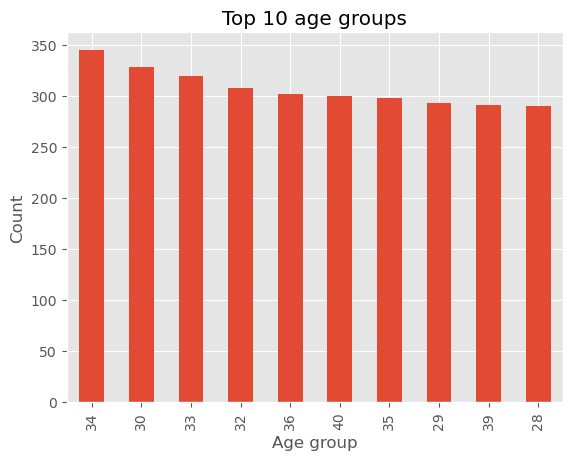

In [19]:
Age = df['age'].value_counts() \
        .head(10) \
        .plot(kind = "bar", title = "Top 10 age groups")
Age.set_xlabel("Age group")
Age.set_ylabel("Count")

Text(0, 0.5, 'Count')

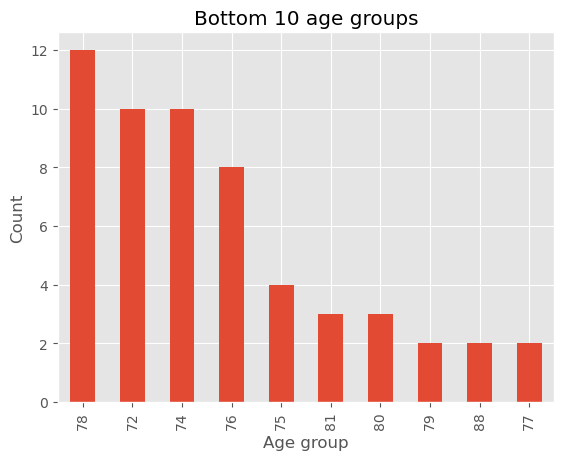

In [20]:
Age = df['age'].value_counts() \
        .tail(10) \
        .plot(kind = "bar", title = "Bottom 10 age groups")
Age.set_xlabel("Age group")
Age.set_ylabel("Count")

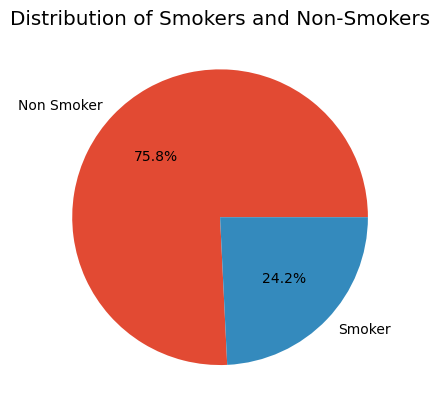

In [80]:
custom_labels = ['Non Smoker', 'Smoker']
smokers = df['smoker'].value_counts() \
    .plot(kind = "pie", autopct='%1.1f%%', title = "Distribution of Smokers and Non-Smokers",
          ylabel = '', labels = custom_labels)


# Feature Relationships

#### Which age group is most affected by smoking?

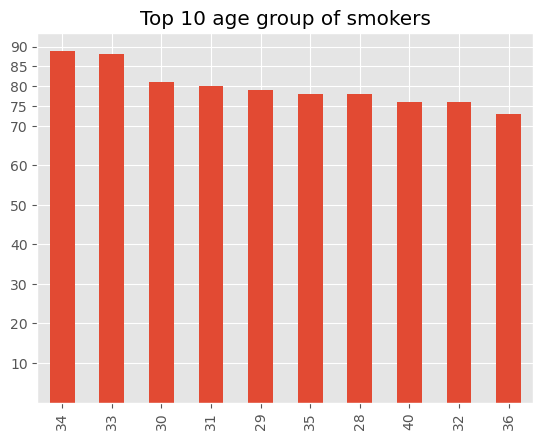

In [39]:
df.query("smoker == 'yes'")['age'] \
    .value_counts() \
    .head(10) \
    .plot(kind = "bar", title = "Top 10 Age Groups of Smokers")
plt.yticks(ticks = [10,20,30,40,50,60,70,75,80,85,90])
plt.show()

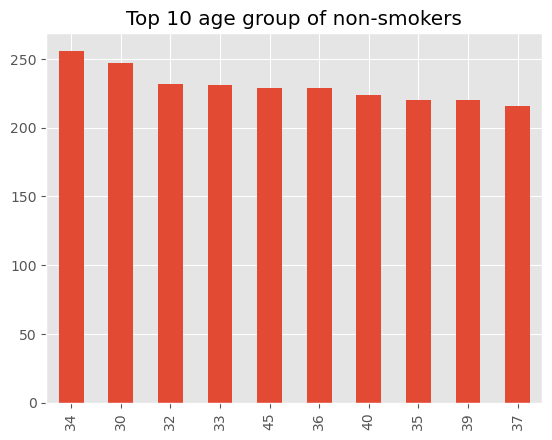

In [78]:
df.query("smoker == 'no'")['age'] \
    .value_counts() \
    .head(10) \
    .plot(kind = "bar", title = "Top 10 age group of non-smokers")
# plt.yticks(ticks = [10,20,30,40,50,60,70,75,80,85,90])
plt.show()

It can be seen in the above graphs that our data set has sampling bias. Because it contains most of the observations from the people with age ranging from 28 to 40.

##### How many people are affected by the ban on smoking in the working area? Also what is the gender distribution in them?

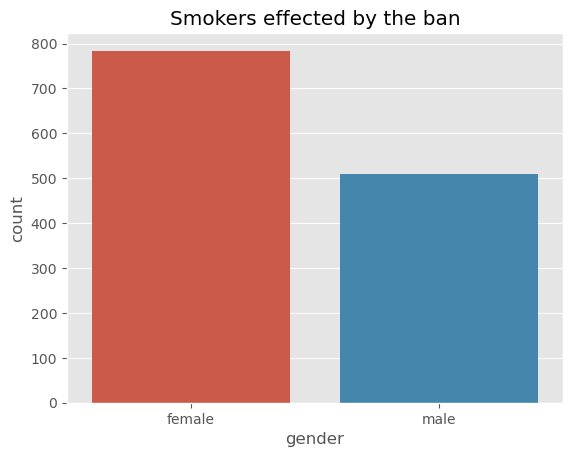

In [79]:
smoker_ban_df = df.query('smoker == "yes" and ban == "yes"')

sns.countplot(data = smoker_ban_df, x='gender')
plt.title('Effect of Ban on Smokers by Gender')
plt.show()


##### Relationship between employees (smoker or non smoker) in companies where smoking is (ban or not ban)

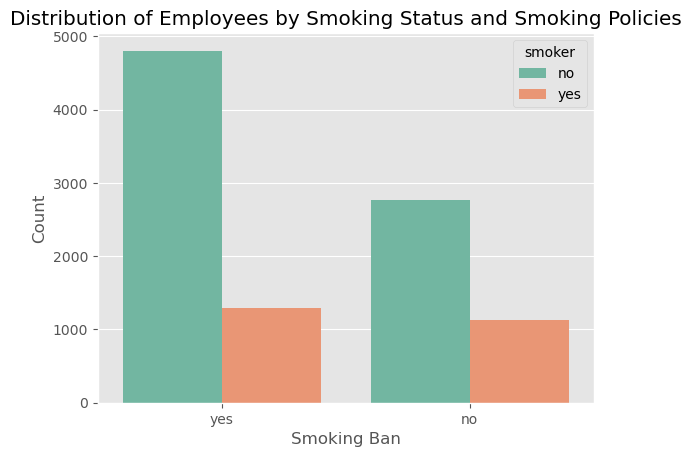

In [84]:
sns.countplot(data=df, x='ban', hue='smoker', hue_order=['no', 'yes'], palette='Set2')

# Set the title and labels
plt.title('Distribution of Employees by Smoking Status and Smoking Policies')
plt.xlabel('Smoking Ban')
plt.ylabel('Count')

# Show the plot
plt.show()


#### Conclusion
It can be seen in the graph that the company which has smoking ban tends to have higher number of non-smoker employees. Here we have to keep in mind that the data is not equally representing the total number of employees for companies with smoking ban and no smoking ban. The difference can be seen in the graph below.

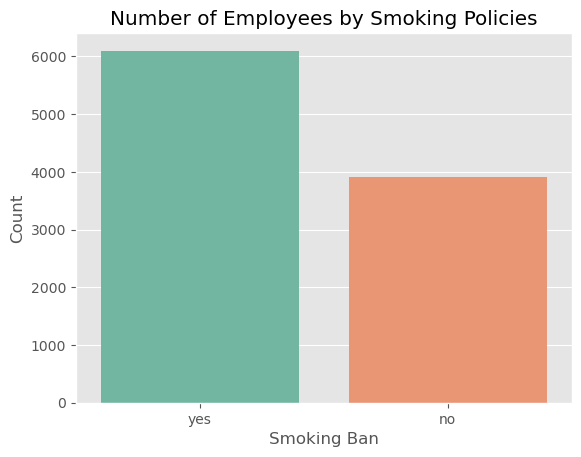

In [86]:
sns.countplot(data=df, x='ban',  palette='Set2')

# Set the title and labels
plt.title('Number of Employees by Smoking Policies')
plt.xlabel('Smoking Ban')
plt.ylabel('Count')

# Show the plot
plt.show()